In [9]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## Scikit-Learn Implementations
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Dimensionality Reduction using PCA.
Creating linear regression models to predict the performance of an antenna.

## Data Analysing

### Input Data

In [13]:
#Data loading
data = pd.read_csv('hw1_input.csv')
data

,length of patch,width of patch,height of patch,height of substrate,height of solder resist layer,radius of the probe,c_pad,c_antipad,c_probe,dielectric constant of substrate,dielectric constant of solder resist layer
0,3.202024,2.288742,0.012514,0.139247,0.041757,0.028566,0.000549,0.032403,0.348140,3.735926,4.278575
1,2.107848,2.895504,0.037171,0.149492,0.056775,0.028930,0.005536,0.053647,0.326369,4.929862,4.876068
2,3.252113,4.818411,0.025432,0.578834,0.029972,0.030922,0.020274,0.049845,0.446639,4.772670,4.745106
3,4.161509,2.294309,0.011058,0.117266,0.093223,0.017604,0.001135,0.098610,0.055665,4.102438,3.755671
4,4.820912,2.948325,0.019658,0.163503,0.094337,0.025757,0.021725,0.072813,0.272282,2.531031,3.047553
...,...,...,...,...,...,...,...,...,...,...,...
380,3.950131,5.165856,0.034389,0.770787,0.095579,0.025591,0.011430,0.048502,0.241219,4.099788,4.635040
381,2.676373,2.826965,0.011377,0.106795,0.055925,0.042376,0.005102,0.060532,0.294000,4.758303,4.205687
382,4.406785,1.814310,0.011187,0.146086,0.049041,0.040626,0.022849,0.033737,0.225794,2.826602,4.908306
383,2.540721,3.310983,0.015000,0.135650,0.082388,0.043490,0.011130,0.033451,0.370502,3.303852,4.764701


We are dealing with a data with 384 instances, 11 numeric attributes whose ranges are given.

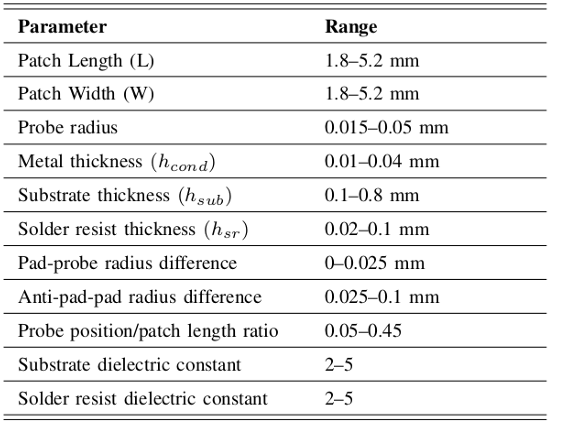

In [18]:
#Check summary statistics
data.describe()

,length of patch,width of patch,height of patch,height of substrate,height of solder resist layer,radius of the probe,c_pad,c_antipad,c_probe,dielectric constant of substrate,dielectric constant of solder resist layer
count,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
mean,3.569210,3.536983,0.024273,0.347643,0.060065,0.032198,0.012797,0.060648,0.245586,3.704384,3.521911
std,0.966173,1.182100,0.008800,0.272738,0.023670,0.010352,0.007111,0.021503,0.111245,0.853877,0.871233
min,1.805658,1.801273,0.010008,0.100321,0.020039,0.015012,0.000003,0.025292,0.050810,2.023380,2.001679
25%,2.755534,2.501163,0.016194,0.126901,0.038689,0.023389,0.006985,0.042011,0.148565,2.998152,2.783710
50%,3.637716,3.215396,0.024198,0.155254,0.060764,0.030979,0.012454,0.060532,0.245049,3.866295,3.480916
75%,4.369311,4.829731,0.031688,0.649324,0.080247,0.041819,0.019014,0.078227,0.340203,4.375551,4.278575
max,5.199919,5.198689,0.039843,0.799082,0.099728,0.049960,0.024996,0.099945,0.449599,4.999324,4.999950


In [17]:
#Check correlation
data.corr()

,length of patch,width of patch,height of patch,height of substrate,height of solder resist layer,radius of the probe,c_pad,c_antipad,c_probe,dielectric constant of substrate,dielectric constant of solder resist layer
length of patch,1.000000,-0.114174,-0.026032,-0.064344,0.044502,-0.069905,-0.005560,-0.009627,0.081735,-0.037448,-0.014496
width of patch,-0.114174,1.000000,0.091726,0.923739,-0.021056,0.035675,-0.044198,-0.013358,0.029999,0.442193,0.038746
height of patch,-0.026032,0.091726,1.000000,0.082833,0.036045,0.030689,0.002422,0.037583,0.031592,-0.044318,-0.037769
height of substrate,-0.064344,0.923739,0.082833,1.000000,-0.011870,0.017410,-0.031571,-0.009432,0.044166,0.459847,0.002421
height of solder resist layer,0.044502,-0.021056,0.036045,-0.011870,1.000000,-0.012756,-0.018044,-0.017071,0.024842,-0.010967,-0.038405
radius of the probe,-0.069905,0.035675,0.030689,0.017410,-0.012756,1.000000,0.002906,-0.000523,0.048088,-0.025728,0.007524
c_pad,-0.005560,-0.044198,0.002422,-0.031571,-0.018044,0.002906,1.000000,0.067678,-0.015500,-0.049318,0.015284
c_antipad,-0.009627,-0.013358,0.037583,-0.009432,-0.017071,-0.000523,0.067678,1.000000,-0.132321,-0.016741,0.067821
c_probe,0.081735,0.029999,0.031592,0.044166,0.024842,0.048088,-0.015500,-0.132321,1.000000,0.015640,-0.029101
dielectric constant of substrate,-0.037448,0.442193,-0.044318,0.459847,-0.010967,-0.025728,-0.049318,-0.016741,0.015640,1.000000,0.060402


<Axes: >

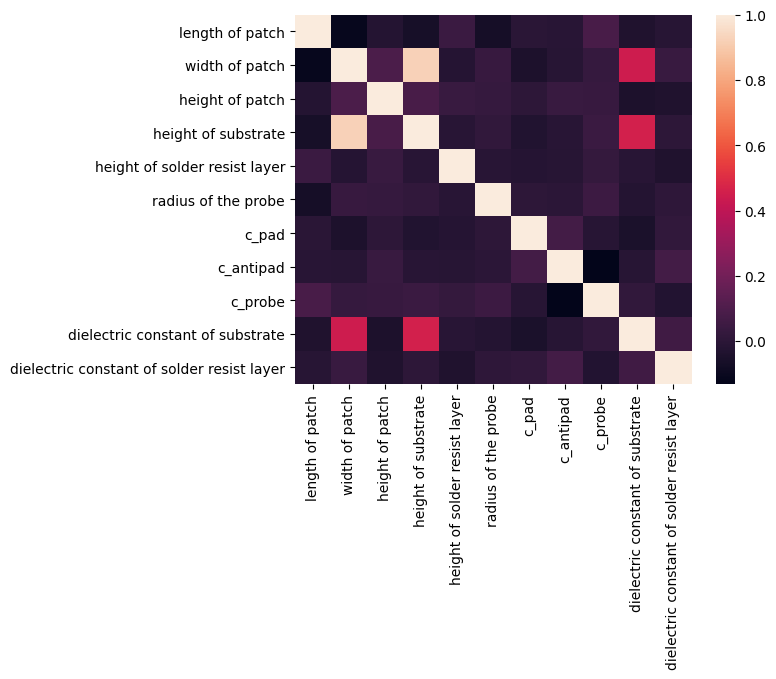

In [19]:
#Visualisation for correlation
sns.heatmap(data.corr())

There is a high correlation between the height of substrate and the width of patch.

### Target Data

In [21]:
# Load the data
real_S11 = pd.read_csv('hw1_real.csv', header=None)  # Real part of S11
imag_S11 = pd.read_csv('hw1_img.csv', header=None)   # Imaginary part of S11

$  {Magnitude}(S_{11})  = 
{Real Part}^2
 +{Imaginary Part}^2$
​


In [22]:
# Calculate the magnitude of S11
S11_magnitude = np.sqrt(real_S11**2 + imag_S11**2)

In [24]:
S11_magnitude

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,0.000000,1.414214,2.828427,4.242641,5.656854,7.071068,8.485281,9.899495,11.313708,12.727922,...,270.114790,271.529004,272.943218,274.357431,275.771645,277.185858,278.600072,280.014285,281.428499,282.842712
1,0.781778,0.783440,0.785795,0.788790,0.792359,0.796433,0.800936,0.805793,0.810930,0.816277,...,0.988520,0.988551,0.988581,0.988610,0.988638,0.988664,0.988690,0.988714,0.988737,0.988759
2,0.986860,0.986669,0.986470,0.986263,0.986048,0.985824,0.985592,0.985350,0.985100,0.984839,...,0.945061,0.945880,0.946669,0.947428,0.948158,0.948861,0.949537,0.950188,0.950814,0.951417
3,0.866883,0.865643,0.864258,0.862724,0.861039,0.859198,0.857199,0.855036,0.852705,0.850202,...,0.865665,0.861328,0.856551,0.851268,0.845404,0.838870,0.831564,0.823368,0.814148,0.803752
4,0.995069,0.995055,0.995041,0.995025,0.995009,0.994991,0.994973,0.994953,0.994933,0.994912,...,0.935682,0.932755,0.929637,0.926312,0.922765,0.918978,0.914932,0.910607,0.905982,0.901033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,0.712967,0.703130,0.692989,0.682545,0.671797,0.660746,0.649395,0.637749,0.625814,0.613598,...,0.675654,0.683714,0.691363,0.698625,0.705520,0.712067,0.718286,0.724194,0.729808,0.735143
382,0.901571,0.894376,0.886417,0.877604,0.867842,0.857028,0.845054,0.831812,0.817200,0.801129,...,0.990712,0.990714,0.990716,0.990716,0.990715,0.990713,0.990710,0.990706,0.990701,0.990695
383,0.985925,0.986114,0.986294,0.986465,0.986629,0.986785,0.986934,0.987076,0.987212,0.987341,...,0.987993,0.987889,0.987783,0.987674,0.987561,0.987445,0.987326,0.987204,0.987078,0.986949
384,0.984282,0.984049,0.983807,0.983558,0.983300,0.983034,0.982758,0.982473,0.982179,0.981875,...,0.911483,0.913052,0.914566,0.916027,0.917439,0.918802,0.920118,0.921390,0.922618,0.923805


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


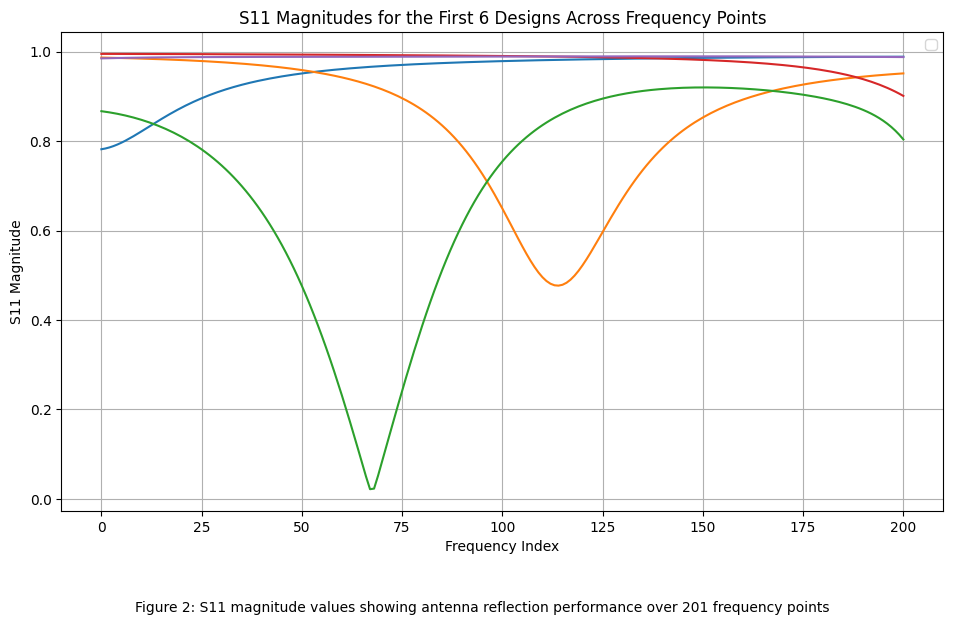

In [30]:
# Plot the magnitude for the first 6 designs
fig, ax = plt.subplots(figsize=(10, 6))
# Customize the plot
ax.set_title('S11 Magnitudes for the First 6 Designs Across Frequency Points')
ax.set_xlabel('Frequency Index')
ax.set_ylabel('S11 Magnitude')
ax.grid(True)

# Add a caption below the plot
plt.figtext(0.5, -0.05, "Figure 2: S11 magnitude values showing antenna reflection performance over 201 frequency points", 
            ha="center", fontsize=10, wrap=True)

# Adjust layout to make space for the caption
plt.tight_layout(pad=2.0)

for i in range(1, 6):  # First 6 designs
    plt.plot(S11_magnitude.iloc[i, :], label=f'Design {i+1}')

## PCA with Scikit-Learn


### Scaling the Data

In [20]:
#Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data

array([[-0.38053635, -1.05732657, -1.33803638, ...,  0.92307354,
         0.03698813,  0.86962762],
       [-1.51449522, -0.54336713,  1.46753758, ...,  0.72711013,
         1.43706086,  1.55632159],
       [-0.32862617,  1.08543737,  0.13182652, ...,  1.80964411,
         1.25272921,  1.40580839],
       ...,
       [ 0.86802778, -1.45919555, -1.48897205, ..., -0.17814737,
        -1.02933427,  1.59337237],
       [-1.06588423, -0.1914341 , -1.05517032, ...,  1.12435073,
        -0.46968549,  1.42832907],
       [-1.18548549,  1.23796583,  0.56246389, ..., -0.27385395,
         0.76235199, -0.97154523]])

In [ ]:
pca = PCA(n_components=2)

principal_components = pca.fit_transform(scaled_X)

plt.figure(figsize=(8,6))
plt.scatter(principal_components[:,0],principal_components[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')